In [2]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer

In [3]:
df = pd.read_csv('emails.csv')
df1 = df

In [4]:
df1

,Text,Spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
...,...,...
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0


In [5]:
df2 = pd.read_csv('spam.csv', encoding='latin-1')
df3 = pd.read_csv('class-spam.csv', encoding='latin-1')

In [6]:
df3 = df3.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1)

In [7]:
df2

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ã¼ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [8]:
df3

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [9]:
df2.rename(columns = {'Category':'Spam', 'Message':'Text'}, inplace = True)
df3.rename(columns = {'v1':'Spam', 'v2':'Text'}, inplace = True)

In [10]:
df4 = df2 + df3

In [11]:
df4

,Spam,Text
0,hamham,"Go until jurong point, crazy.. Available only ..."
1,hamham,Ok lar... Joking wif u oni...Ok lar... Joking ...
2,spamspam,Free entry in 2 a wkly comp to win FA Cup fina...
3,hamham,U dun say so early hor... U c already then say...
4,hamham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spamspam,This is the 2nd time we have tried 2 contact u...
5568,hamham,Will Ã¼ b going to esplanade fr home?Will Ì_ b...
5569,hamham,"Pity, * was in mood for that. So...any other s..."
5570,hamham,The guy did some bitching but I acted like i'd...


In [12]:
def swap_columns(df4, col1, col2):
    # creating a list of column names
    col_list = list(df4.columns)
    
    # getting the indices of the columns to be swapped
    idx_col1, idx_col2 = col_list.index(col1), col_list.index(col2)
    
    # swapping the columns by rearranging the list
    col_list[idx_col2], col_list[idx_col1] = col_list[idx_col1], col_list[idx_col2]
    
    # returning a new dataframe with columns rearranged
    return df4[col_list]

# Now, use this function to swap the columns 'Spam' and 'Text'
df5 = swap_columns(df4, 'Spam', 'Text')


In [13]:
df5

,Text,Spam
0,"Go until jurong point, crazy.. Available only ...",hamham
1,Ok lar... Joking wif u oni...Ok lar... Joking ...,hamham
2,Free entry in 2 a wkly comp to win FA Cup fina...,spamspam
3,U dun say so early hor... U c already then say...,hamham
4,"Nah I don't think he goes to usf, he lives aro...",hamham
...,...,...
5567,This is the 2nd time we have tried 2 contact u...,spamspam
5568,Will Ã¼ b going to esplanade fr home?Will Ì_ b...,hamham
5569,"Pity, * was in mood for that. So...any other s...",hamham
5570,The guy did some bitching but I acted like i'd...,hamham


In [14]:
mapping = {'spam': 1, 'ham': 0}
df5 = df5['Spam'] = df4['Spam'].replace(mapping)

In [15]:
df5

RecursionError: maximum recursion depth exceeded

## Data Insights

In [16]:
length = len(df1)
label = df1.Spam.value_counts()
des = df1.describe()

print("The size of the dataset is: ", length)
print("The number of spam emails is: ", label[1])
print("The number of ham emails is: ", label[0])

The size of the dataset is:  5728
The number of spam emails is:  1368
The number of ham emails is:  4360


In [17]:
df1.describe()

,Spam
count,5728.000000
mean,0.238827
std,0.426404
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


Text(0.5, 1.0, 'Spam vs Non-Spam Distribution')

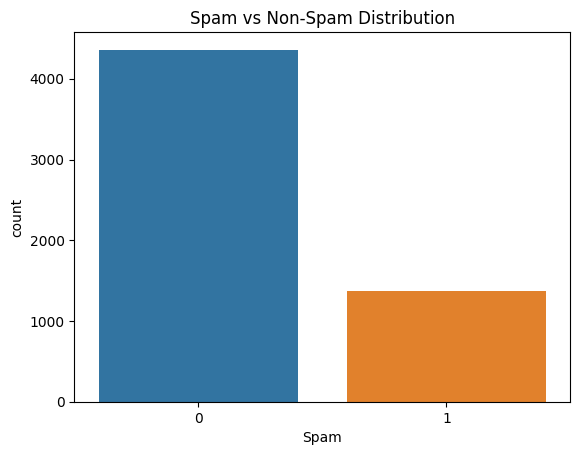

In [18]:
sns.countplot(data=df1, x='Spam').set_title("Spam vs Non-Spam Distribution")

# Building a model to predict the email is spam or not

In [19]:
df1.dropna(inplace=True)
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df1['Text'])

In [20]:
wnl = WordNetLemmatizer()

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, df1['Spam'], test_size=0.25, random_state=42)

print("Training set size:", X_train.shape[0])
print("Testing set size:", X_test.shape[0])

Training set size: 4296
Testing set size: 1432


In [22]:
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

y_pred = nb_classifier.predict(X_test)

accuracy = metrics.accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

print(metrics.classification_report(y_test, y_pred))

Accuracy: 0.9888268156424581
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1063
           1       0.97      0.99      0.98       369

    accuracy                           0.99      1432
   macro avg       0.98      0.99      0.99      1432
weighted avg       0.99      0.99      0.99      1432



In [26]:
def pre_process_text(textArray):
    wnl = WordNetLemmatizer()
    processed_text = []
    for text in textArray:
        words_list = (str(text).lower()).split()
        final_words = [wnl.lemmatize(word) for word in words_list if word not in stopwords.words('english')]
        final_words_str = str((" ".join(final_words)))
        processed_text.append(final_words_str)
    return processed_text

def predict_spam(email: str, classifier, vectorizer) -> str:
    # Pre-process the email text
    processed_email = pre_process_text([email])
    email_processed = vectorizer.transform(processed_email)
    prediction = classifier.predict(email_processed)
    
    if prediction == 0:
        return "The email is not spam."
    else:
        return "The email is spam."

new_email = """Your request to edit "Cypher_Blockchain" has been approved.

Edit in Figma
Figma is a design platform for teams who build products together. Born on the Web, Figma helps the entire product team create, test, and ship better designs, faster.
"""

result = predict_spam(new_email, nb_classifier, vectorizer)
print(result)

The email is spam.


In [ ]:
import nltk
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/visheshgiyanani/nltk_data...
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/visheshgiyanani/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True